In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [50]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': '#e37e00',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'font.family': 'Khmer Sangam MN',
  'axes.facecolor': 'white',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'grid.linewidth': '1',
  'legend.scatterpoints': '2',
  'axes.titlesize': 'large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  'axes.prop_cycle': cycler('color', ['#C10534', '#ffd200', '#e37e00', '#00887d', '#7ad2f6', '#014d64']),
  'xtick.major.bottom': True,
  'xtick.minor.bottom': True,
  'xtick.major.size': 7,
  'xtick.major.pad': 2,
  'xtick.direction': 'in',
  'xtick.labelsize': 'medium',
  'ytick.left': True,
  'ytick.labelsize': 'large',
  'grid.color': '#d9e6eb',
  'grid.linestyle': '-',
  'figure.facecolor': 'white'
})

In [3]:
df = pd.read_csv("gdp_merge.csv")

In [11]:
# QC'ing my joined df to make sure no countries got duplicated
# df[~df.Origin.isnull()] JUST NOTE TO REMEMBER THE TIDLA MEANS NOT THIS
# df[df.Origin.isnull()] ANY ROW THAT HAS NaN IN Origin COLUMN MUST BE A DUP FROM SLIGHTLY DIFF
# NAME IN THE GDP DF THAT CAME FROM THE JOIN BUT THERE AREN'T ANY

In [10]:
df.Origin.value_counts()

Syrian Arab Rep.    112
Name: Origin, dtype: int64

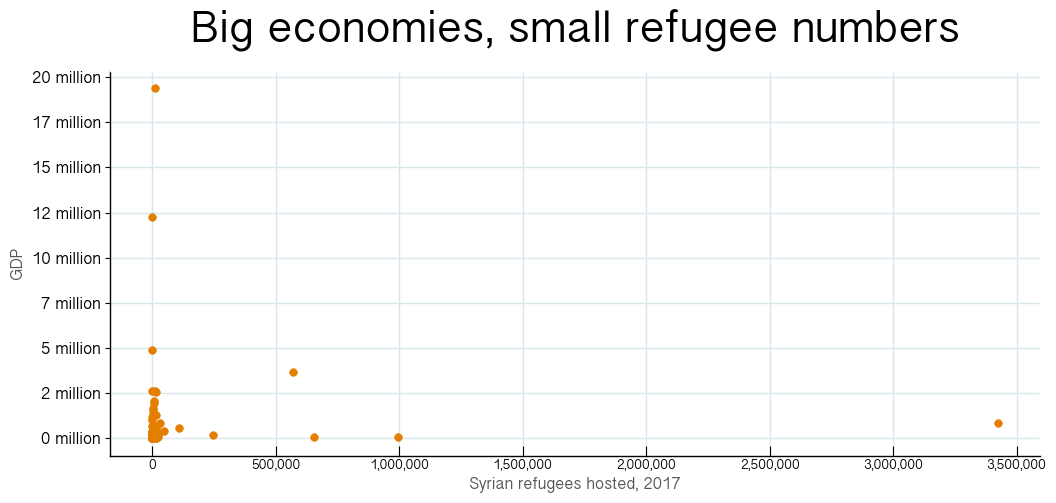

In [51]:
from matplotlib.ticker import FuncFormatter

def with_commas(value, pos):
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)

def with_words(value, pos):
    millions = int(value / 1000000)
    return "{} million".format(millions)

w_formatter = FuncFormatter(with_words)

ax = df.plot(kind='scatter', x='Total_Population', y='gdp', s=30, figsize=(12,5))

ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(w_formatter)

ax.set_title("Big economies, small refugee numbers", fontweight='bold', pad=20)
# add subtitle in Ai: "Country GDP v number of Syrian refugees it's hosting"
ax.title.set_fontsize(33)
ax.title.set_fontname("Khmer Sangam MN")

ax.set_xlabel("Syrian refugees hosted, 2017")
ax.set_ylabel("GDP")

ax.spines['bottom'].set_color('black')
# ax.spines['top'].set_color('black')
# try something with ax.grid(False, axis=0) something like that to keep vert grid lines only
ax.spines['left'].set_color('black')

plt.show()

# plt.savefig("refugees_scatter.pdf", transparent=True)

In [ ]:
# SAVE THE SCATTER, FIX IT IN AI
# MAKE THE TWO OTHER GRAPHS, WITH TOP FIVE GDP AND REFUGEES, AND TOP FIVE HOSTERS AND THEIR GDP RANK